# Chapter 2: Forecast KPI

Once a model is developed, we need to quantify its accuracy. Measuring forecast accuracy (or error) is not an easy task. Experimentation will show which KPI is the best for you. Each indicator will avoid some pitfalls, but will be prone to others.

First, we distinguish between accuracy and bias:
1. **accuracy**: measures how much spread you had between your forecasts and the actual values. It gives an idea of the magnitude of the errors, but not their overall direction,
2. **bias**: represents the overall direction of the historical average error. It measures if your forecasts were on average too high (overshot the demand), or too low (undershot the demand).

We want to have a forecast that is both accurate and unbiased. An error during one period is defined as the difference between the forecast and the demand:
$$e_t = f_t - d_t.$$


## Bias

The average bias of a forecast is defined as its average error:

$$\text{bias} = \frac{1}{n}\sum e_t,$$
where $n$ is the number of historical periods where you have both a forecast and a demand. The bias alone is not enough to evaluate the forecast accuracy (positive error can offset a negative error from another period), but a highly biased model is an indication that something is wrong in the model. It usually brings no insights to compute the bias of one item during one period. You should either compute it for many products at once (during one period) or compute it for a single item over many periods (best to perform its computation over a full season cycle).

This formula will give an answer which is hard to interpret. Without information about average demand, it is  difficult to say if the bias is "good". Therefore, a more relevant KPI would be the scaled bias, where the bias is divided by the average demand:
$$\text{bias \%} = \frac{\sum e_t}{\sum d_t}.$$

In [1]:
import support

d = [37, 60, 85, 112, 132, 145, 179, 198, 150, 132]
df = support.moving_average(d, extra_periods=4, n=3)
support.kpi(df)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%


## MAPE

The Mean Absolute Percentage Error (MAPE) is one of the most commonly used KPIs to measure forecast accuracy. It is computed as the average of the individual absolute errors divided by the demand (each period calculated separately):
$$MAPE = \frac{1}{n}\sum \frac{|e_t|}{d_t}.$$

This metric is quite well-known, despite being a really poor accuracy indicator. It is skewed in the sense that high errors during ow-demand periods will have a major impact on MAPE. Extremely low forecasts (0 for all periods) will result in a maximum error of $100\%$, but too-high forecast will not be capped to a specific percentage error. Due to this, optimizing MAPE will result in a strane forecast that will most likely undershoot the demand.

In [2]:
support.kpi(df)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%


## MAE

The Mean Absolute Error (MAE) is a very good KPI to measure forecast accuracy. It is the mean of the absolute error:
$$MAE = \frac{1}{n} \sum |e_t|.$$

The evaluation of the metric is highly dependent on the average demand during the period, so a scaled percentage MAE can also be defined:

$$MAE\% = \frac{\sum |e_t|}{\sum d_t}$$

In [3]:
support.kpi(df)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%


## RMSE 

The Root Mean Square Error (RMSE) is difficult to interpret, as it is the square root of the average forecast error:
$$RMSE = \sqrt{\frac{1}{n}\sum e_t^2}.$$

Just like with MAE, RMSE is not scaled to the demand, so it needs to be put in percentages to be understandable:
$$RMSE\% = \frac{RMSE}{\frac{1}{n}\sum d_t}$$

In [4]:
support.kpi(df)

Bias: 22.95, 15.33%
MAPE: 29.31%
MAE: 42.29, 28.24%
RMSE: 43.20, 28.85%


## Which forecast KPI to choose?

Imagine a product with a low and rather flat weekly demand that occasionally has a big order.

In [5]:
import pandas as pd

df = pd.DataFrame({
    "day": ["Mon", "Tue", "Wed", "Thu", "Fri"],
    "W1": [3, 1, 5, 20, 13],
    "W2": [3, 4, 5, 4, 16],
    "W3": [4, 1, 1, 3, 14],
    "W4": [1, 2, 1, 2, 5],
    "W5": [5, 2, 12, 1, 20]
})

df

,day,W1,W2,W3,W4,W5
0,Mon,3,3,4,1,5
1,Tue,1,4,1,2,2
2,Wed,5,5,1,1,12
3,Thu,20,4,3,2,1
4,Fri,13,16,14,5,20


Imagine we propose three different forecasts for this product: first one predicts 2 pieces/day, the second one 4, and the last one 6.

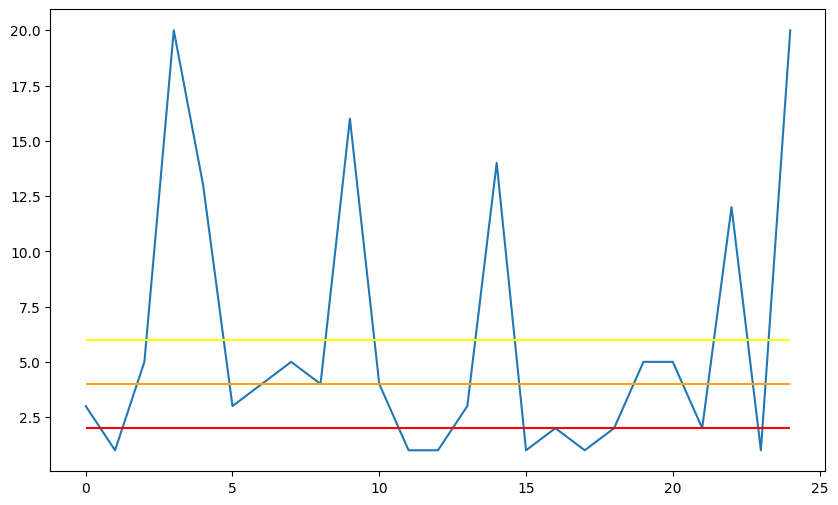

In [13]:
import matplotlib.pyplot as plt

data = df["W1"].to_list() + df["W2"].to_list() + df["W3"].to_list() + df["W4"].to_list() + df["W5"].to_list()

plt.figure(figsize = (10, 6))
plt.plot(data)
plt.hlines(y = 2, xmin = 0, xmax = 24, color = "red")
plt.hlines(y = 4, xmin = 0, xmax = 24, color = "orange")
plt.hlines(y = 6, xmin = 0, xmax = 24, color = "yellow")

In [10]:
model1 = pd.DataFrame({
    "demand": data,
    "forecast": [2] * len(data),
    "error": [2 - x for x in data],
})

support.kpi(model1)

Bias: -3.92, -66.22%
MAPE: 64.45%
MAE: 4.40, 74.32%
RMSE: 7.12, 120.21%


In [14]:
model2 = pd.DataFrame({
    "demand": data,
    "forecast": [4] * len(data),
    "error": [4 - x for x in data],
})

support.kpi(model2)

Bias: -1.92, -32.43%
MAPE: 108.89%
MAE: 4.08, 68.92%
RMSE: 6.24, 105.44%


In [15]:
model3 = pd.DataFrame({
    "demand": data,
    "forecast": [6] * len(data),
    "error": [6 - x for x in data],
})

support.kpi(model3)

Bias: 0.08, 1.35%
MAPE: 179.74%
MAE: 4.80, 81.08%
RMSE: 5.94, 100.33%


Forecast 1 was best in terms of MAPE, but the worst in RMSE. Forecast 2 is the demand median, so it resulted in best MAE. Forecast 3 is the average demand, so it resulted in the best RMSE and bias.

## Median vs. Average 

Before discussing the different forecast KPIs further, let's take some time to under- stand why a forecast of the median will get a good MAE while a forecast of the mean will get a good RMSE.

For many products, you will observe that the median demand is not the same as the av- erage demand. The demand will most likely have some peaks here and there that will result in a skewed distribution. These skewed demand distributions are widespread in supply chain, as the peaks can be due to periodic promotions or clients ordering in bulk.
